# DATA SCIENCE JOB MARKET ANALYSIS

## 1. Web Scraping using Selenium

In [75]:
#import necessary packages
import time
from selenium import webdriver
import pandas as pd
import matplotlib.pyplot as plt
#create an instance of browser
driver = webdriver.Chrome()

#creating a dictionary for storing the information after scraping
jobs={"roles":[],
     "companies":[],
     "locations":[],
     "experience":[],
     "skills":[]}


In [5]:
#iterate over first 30 pages; each page contains 20 results
#for each job we will scrape the role,company, location, experience, skills

for i in range(50):
    driver.get("https://www.naukri.com/data-scientist-jobs-{}".format(i))
    time.sleep(3)
    lst=driver.find_elements_by_css_selector(".jobTuple.bgWhite.br4.mb-8")
    
    for job in lst:
        driver.implicitly_wait(10)
        role=job.find_element_by_css_selector("a.title.fw500.ellipsis").text
        company=job.find_element_by_css_selector("a.subTitle.ellipsis.fleft").text
        location=job.find_element_by_css_selector(".fleft.grey-text.br2.placeHolderLi.location").text
        exp=job.find_element_by_css_selector(".fleft.grey-text.br2.placeHolderLi.experience").text
        skills=job.find_element_by_css_selector(".tags.has-description").text
        jobs["roles"].append(role)
        jobs["companies"].append(company)
        jobs["locations"].append(location)
        jobs["experience"].append(exp)
        jobs["skills"].append(skills)

In [76]:
import pandas as pd
DS_jobs_df=pd.DataFrame(jobs)

In [71]:
DS_jobs_df.to_csv("DataScience_jobs.csv")

## 2. Pre-processing

In [77]:
DS_jobs_df=pd.read_csv("DataScience_jobs.csv", index_col=0)
DS_jobs_df.tail(5)

,roles,companies,locations,experience,skills
995,Data Analyst,SUPPORT STAR CORPORATE SERVICES PVT. LTD.,Hyderabad,2-5 Yrs,Statistical modeling\nmodel validation\nSAS\nm...
996,Machine Learning Manager - R/python/java,Career Maker,Hyderabad,3-8 Yrs,Java\nR\nC++\nMap - Reduce\nMachine Learning M...
997,Senior Manager - Engineering,Indegene Private Limited,Bengaluru,5-10 Yrs,Pytorch\nTensorflow\nData Science\nJava\nNLP\n...
998,Data Analyst- ( H/ F ),Societe Generale Global Solution Centre Pvt Ltd,Chennai,12-16 Yrs,Data Science\nPredictive Modeling\nR\nNLP\nNoS...
999,Director- Machine Learning,Zycus Infotech Pvt Ltd,Bengaluru,14-20 Yrs,Data Science\nNLP\ncomputational linguistics\n...


In [21]:
#lets check if our data have any null values
DS_jobs_df.isna().sum()

roles         0
companies     0
locations     0
experience    0
skills        2
dtype: int64

In [22]:
#lets drop the missing values
DS_jobs_df=DS_jobs_df.dropna()

In [25]:
#lets check if our data have any dupplicate data
DS_jobs_df[DS_jobs_df.duplicated(subset=["roles","companies","roles","locations","skills"])].shape

(229, 5)

In [522]:
"""print("Before dropping duplicates : ",DS_jobs_df.shape)
DS_jobs_df.drop_duplicates(keep="first",inplace=True)
print("After dropping duplicates : "DS_jobs_df.shape)"""

'print("Before dropping duplicates : ",DS_jobs_df.shape)\nDS_jobs_df.drop_duplicates(keep="first",inplace=True)\nprint("After dropping duplicates : "DS_jobs_df.shape)'

In [26]:
#lets lower case all the strings to avoid redundancy
DS_jobs_df=DS_jobs_df.apply(lambda x: x.astype(str).str.lower())

#there are more than one location and skill are attcahed to each job, so lets split locations and jobs.
DS_jobs_df.skills=[skill.split("\n") for skill in DS_jobs_df.skills]
DS_jobs_df.locations=[location.split(",") for location in DS_jobs_df.locations]
DS_jobs_df[15:20]

,roles,companies,locations,experience,skills
15,sr. data scientist,orcapod consulting services private limited,[bengaluru],6-10 yrs,"[data science, statistical modeling, python, r..."
16,senior data scientist,johnson controls india private limited,[bengaluru(whitefield)],5-6 yrs,"[nlp, image processing, natural language proce..."
17,data scientist- nlp/deep learning- mumbai (5+ ...,crescendo global leadership hiring india priva...,[mumbai],5-8 yrs,"[data science, nlp, deep learning, java, algor..."
18,data scientist,incedo technology solutions ltd.,"[pune, delhi ncr]",5-10 yrs,"[data science, nlp, logistic regression, data ..."
19,data scientist (machine learning)/artificial i...,grayripples.com,"[bengaluru, hyderabad]",1-6 yrs,"[artificial intelligence, machine learning]"


## 3. Exploratory Data analysis

### 3.1. Location wise Data science jobs


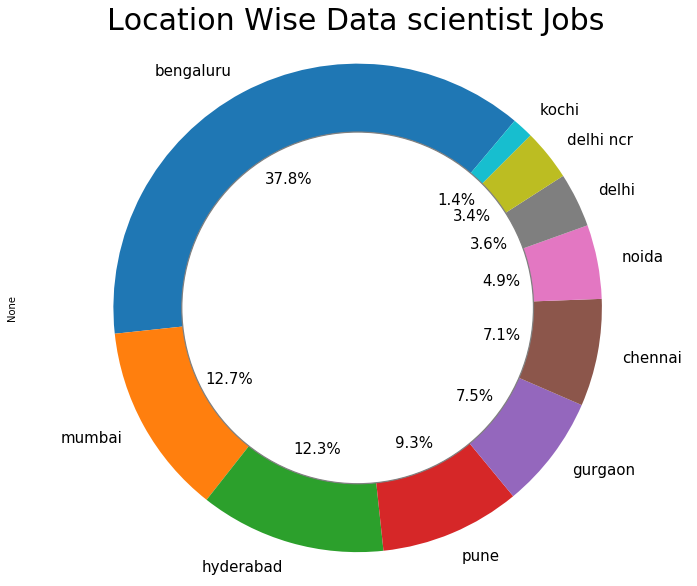

In [18]:
DS_jobs_df.locations.apply(pd.Series).stack().str.strip().value_counts()[:10].plot.pie(figsize=(12,10),startangle=50,autopct='%1.1f%%',fontsize=15)
plt.title("Location Wise Data scientist Jobs",fontsize=30)

#https://medium.com/@krishnakummar/donut-chart-with-python-matplotlib-d411033c960b
centre_circle = plt.Circle((0,0),0.72,color='gray', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

##### Observations:
1. Bangalore tops the list with almost 38% of the total jobs.
2. Top three cities Bangalore,Mumbai, Hyderabad and Pune constitues almost 72% of the total jobs.

### 3.2 Companies with more Data science openings

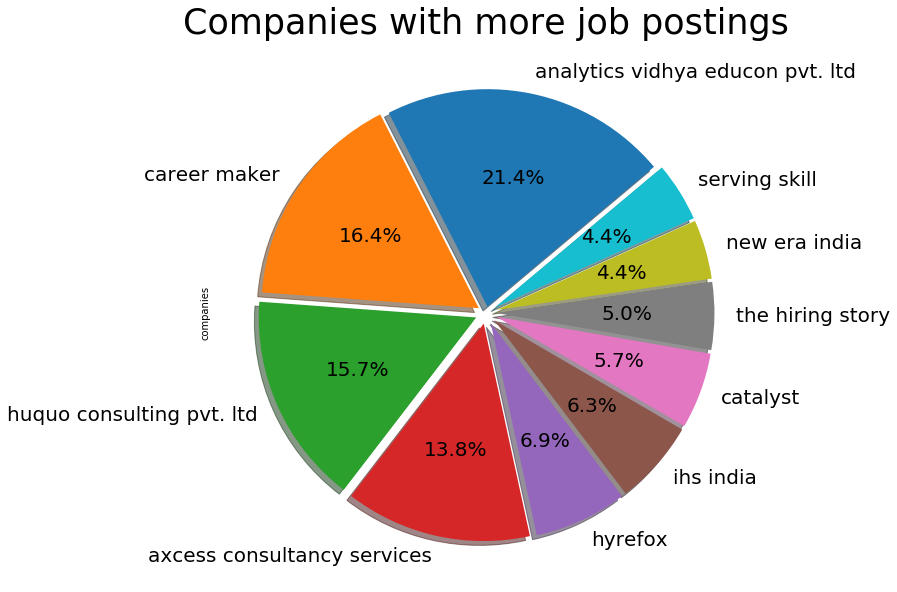

In [34]:
DS_jobs_df["companies"].value_counts()[:10].plot.pie(figsize=(12,10),explode=[0.03,0.04,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05],shadow=True, startangle=40,autopct='%1.1f%%',fontsize=20)
plt.title("Companies with more job postings",fontsize=35)
plt.show()

#### Observations:
1. Analytics vidya tops the list with 17% of the total job listings.
2. there are quite a few consultancies activey recruiting for their clients.

### 3.3 Data Scientist roles in demand

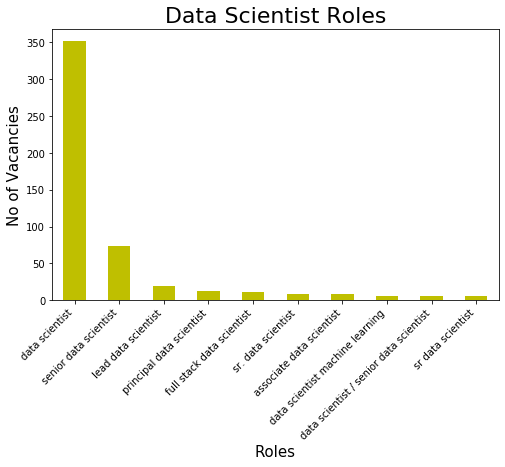

In [59]:
### Roles
DS_jobs_df["roles"].value_counts()[:10].plot.bar(figsize=(8,5),fontsize=10,color="y")#(figsize=(10,10),explode=[0.05,0.04,0.05,0,0,0,0,0,0,0],shadow=True, startangle=50,autopct='%1.1f%%')
plt.xticks(rotation=45,ha='right')
plt.title("Data Scientist Roles",fontsize=22)
plt.ylabel("No of Vacancies",fontsize=15,rotation=90)
plt.xlabel("Roles",fontsize=15)
plt.show()

#### Observations:
1. Data science roles are mostly termed with data scientist role. followed by senior data scientist and lead data scientist roles. 

### 3.4. Desired Experience for Data science jobs

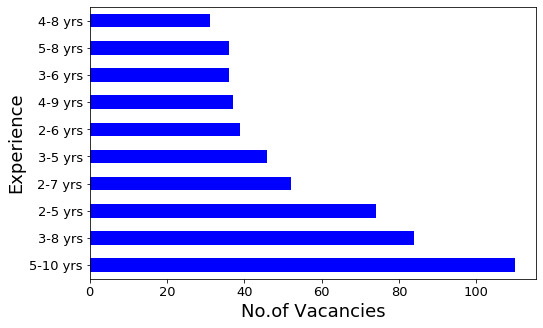

In [51]:
DS_jobs_df["experience"].value_counts()[:10].plot.barh(figsize=(8,5),fontsize=13,color="b")
plt.xlabel("No.of Vacancies",fontsize=18)
plt.ylabel("Experience",fontsize=18)
plt.show()

#### Observations:
1. There seems to more vacancies for people with a good experience.
2. Candidates with atleast 2 years of experience have a fair opportunities.

### 3.5. Skills required for a Data science job

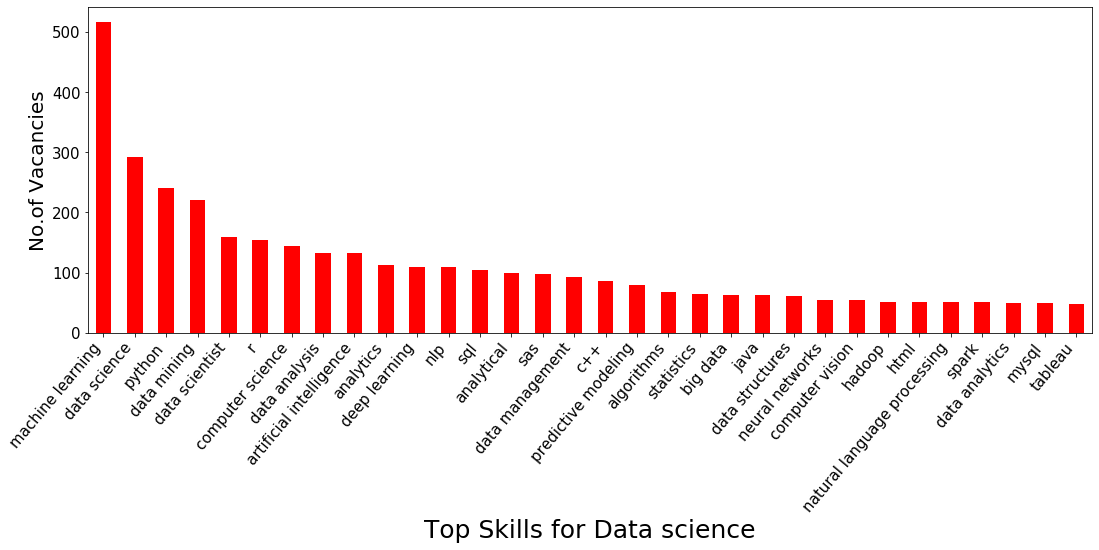

In [66]:
DS_jobs_df.skills.apply(pd.Series).stack().value_counts()[:32].plot(kind="bar",figsize=(18,6),fontsize=15,color="r")
plt.xticks(rotation=50,ha='right')
#plt.title("Top Skills for Data science",fontsize=25)
plt.ylabel("No.of Vacancies",fontsize=20)
plt.xlabel("Top Skills for Data science",fontsize=25)
plt.show()

#### Observations:
1. looks clumsy right lets break it down, the reason i included top 30 skills beacuse of the vast fields covered by Data science.
2. we will go one by one sub fields and compare their peers in that to get the better understanding.

In [61]:
#lets convert the skills column into a seperate DataFrame, which makes things easy for preo processing
jj=pd.DataFrame(DS_jobs_df.skills.apply(pd.Series).stack().value_counts()).reset_index()
jj.columns=["skills","count"]
jj.head()

,skills,count
0,machine learning,516
1,data science,292
2,python,240
3,data mining,221
4,data scientist,159


### 3.5.1. Must Have Skills

In [63]:
#lets first find the top skills for Data science in general
datascience={}
datascience['statistics']=jj["count"][jj['skills'].str.contains('stat', regex=True)].sum()
datascience['machine_learning']=jj["count"][jj['skills'].str.contains('machine |^ml', regex=True)].sum()
datascience['data_analysis']=jj["count"][jj['skills'].str.contains('data ana', regex=True)].sum()
datascience['data_mining']=jj["count"][jj['skills'].str.contains('mining', regex=True)].sum()
datascience['nlp']=jj["count"][jj['skills'].str.contains('nlp|natural', regex=True)].sum()
datascience['computer_vision']=jj["count"][jj['skills'].str.contains('computer vision', regex=True)].sum()
datascience['deep_learning']=jj["count"][jj['skills'].str.contains('deep learning', regex=True)].sum()
datascience['big_data']=jj["count"][jj['skills'].str.contains('big', regex=True)].sum()
from operator import itemgetter
datascience=dict(sorted(datascience.items(), key=itemgetter(1),reverse=True))
datascience

{'machine_learning': 549,
 'data_mining': 255,
 'data_analysis': 215,
 'nlp': 170,
 'statistics': 168,
 'deep_learning': 112,
 'big_data': 77,
 'computer_vision': 55}

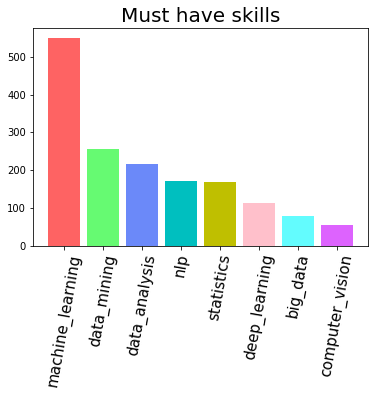

In [69]:
plt.bar(datascience.keys(),datascience.values(),color=["#FE6363","#66FA72","#6B89F9","c","y","pink","#63FCFE","#DD63FE"])
plt.xticks(rotation=80,fontsize=15)
plt.title("Must have skills",fontsize=20)
plt.show()

### 3.5.2. Languauges in demand

In [489]:
languages={}
languages["python"]=jj["count"][jj['skills'].str.contains('python', regex=True)].sum()
languages["r"]=jj["count"][jj['skills'].str.contains('^r$', regex=True)].sum()
languages["matlab"]=jj["count"][jj['skills'].str.contains('matlab', regex=True)].sum()
languages["java"]=jj["count"][jj['skills'].str.contains('java$', regex=True)].sum()
languages["c++"]=jj["count"][jj['skills'].str.contains('c\+', regex=True)].sum()
languages["sas"]=jj["count"][jj['skills'].str.contains('sas', regex=True)].sum()

#to identify the Sql first and then seperate the nosql from the list
sql=jj[jj['skills'].str.contains('sql', regex=True)]
languages["sql"]=sql["count"][~sql['skills'].str.contains('no', regex=True)].sum()

#to sort the dictionary
languages=dict(sorted(languages.items(), key=itemgetter(1),reverse=True))

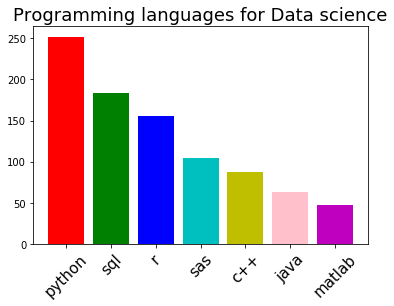

In [510]:
plt.bar(languages.keys(),languages.values(),color=["r","g","b","c","y","pink","m"])
plt.xticks(rotation=45,fontsize=15)
plt.title("Programming languages for Data science",fontsize=18)
plt.show()

### 3.5.3. Deep learning frameworks

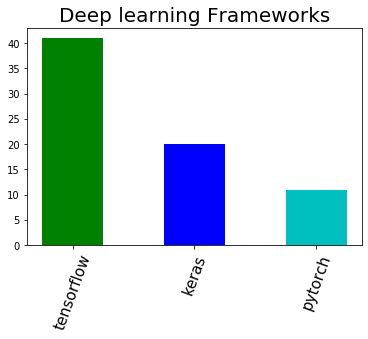

In [511]:
frameworks={}
frameworks['tensorflow']=jj["count"][jj['skills'].str.contains('tensor', regex=True)].sum()
frameworks['keras']=jj["count"][jj['skills'].str.contains('keras', regex=True)].sum()
frameworks['pytorch']=jj["count"][jj['skills'].str.contains('torch', regex=True)].sum()
plt.bar(frameworks.keys(),frameworks.values(),color=["g","b","c"],width=.5)
plt.xticks(rotation=70,fontsize=15)
plt.title("Deep learning Frameworks",fontsize=20)
plt.show()

### 3.5.5. Clouds for Data Science

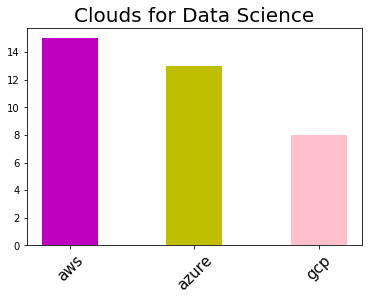

In [513]:
#lets find the skills based on cloud providers
cloud={}
cloud['aws']=jj["count"][jj['skills'].str.contains('aws', regex=True)].sum()
cloud['azure']=jj["count"][jj['skills'].str.contains('azure', regex=True)].sum()
cloud['gcp']=jj["count"][jj['skills'].str.contains('gcp')].sum()
plt.bar(cloud.keys(),cloud.values(),color=["m","y","pink"],width=.45)
plt.xticks(rotation=45,fontsize=15)
plt.title("Clouds for Data Science",fontsize=20)
plt.show()

### 3.5.6. Big data technologies for Data science

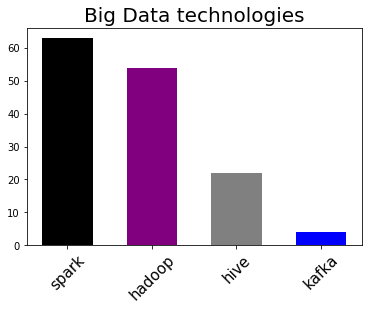

In [516]:
bigdata={}
bigdata["spark"]=jj["count"][jj['skills'].str.contains('spark', regex=True)].sum()
bigdata["hadoop"]=jj["count"][jj['skills'].str.contains('hadoop', regex=True)].sum()
bigdata["hive"]=jj["count"][jj['skills'].str.contains('hive', regex=True)].sum()
bigdata["kafka"]=jj["count"][jj['skills'].str.contains('kafka', regex=True)].sum()

plt.bar(bigdata.keys(),bigdata.values(),color=["black","purple","grey","blue"],width=0.6)
plt.xticks(rotation=45,fontsize=15)
plt.title("Big Data technologies",fontsize=20)
plt.show()

### 3.5.7. Data Visualization tools

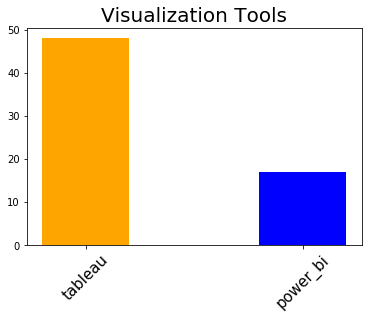

In [519]:
# tools
tools={}
tools["tableau"]=jj["count"][jj['skills'].str.contains('tableau', regex=True)].sum()
tools["power_bi"]=jj["count"][jj['skills'].str.contains('power bi', regex=True)].sum()


plt.bar(tools.keys(),tools.values(),color=["orange","blue"],width=(0.4))
plt.xticks(rotation=45,fontsize=15)
plt.title("Visualization Tools",fontsize=20)
plt.show()